In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

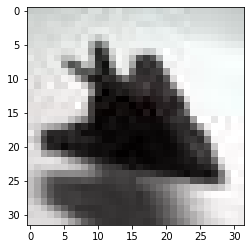

In [2]:
datadir = 'C:/Users/Maksud/Downloads/DATASET/train'
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
for cl in classes:
    path = os.path.join(datadir, cl)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

In [3]:
img_array.shape

(32, 32, 3)

In [4]:
training_data = []
def create_training_data():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                training_data.append([img_array, cls_num])
            except Exception as e:
                pass

In [5]:
create_training_data()
len(training_data)

50000

In [6]:
x_train = []
y_train = []

for pic, label in training_data:
    x_train.append(pic)
    y_train.append(label)

In [7]:
datadir = 'C:/Users/Maksud/Downloads/DATASET/test'



test_data = []
def create_test_data():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                test_data.append([img_array, cls_num])
            except Exception as e:
                pass
                


In [8]:
create_test_data()
len(test_data)

10000

In [9]:
x_test = []
y_test = []

for pic, label in test_data:
    x_test.append(pic)
    y_test.append(label)

In [10]:
X_train=np.array(x_train)
y_train=np.array(y_train)
X_test=np.array(x_test)
y_test=np.array(y_test)

print('Training data shape: ', X_train.shape)

print('Training labels shape: ', y_train.shape)

print('Test data shape: ', X_test.shape)

print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


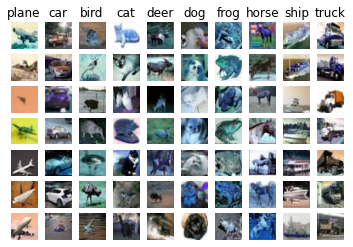

In [11]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [12]:
# Memory error prevention by subsampling data

num_training = 50000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 10000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [13]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(50000, 3072) (10000, 3072)


In [14]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=0
k=0
k_choices=[]
k_to_accuracies=[]
for i in range(1,21):
    n_neighbors+=1
    k+=1
    
    print("K Value =" , n_neighbors)
    knn=KNeighborsClassifier(n_neighbors)
    knn.fit(X_train,y_train)
    y_pred_knn=knn.predict(X_test)
    y_pred_knn
    accuracy=accuracy_score(y_pred_knn,y_test)
    k_choices.append(k)
    k_to_accuracies.append(accuracy)
    
    print("Accuracy value= ", accuracy)
    
    #print(classification_report(y_pred_knn,y_test))

K Value = 1
Accuracy value=  0.353
K Value = 2
Accuracy value=  0.3123
K Value = 3
Accuracy value=  0.329
K Value = 4
Accuracy value=  0.3386
K Value = 5
Accuracy value=  0.3395
K Value = 6
Accuracy value=  0.3407
K Value = 7
Accuracy value=  0.3359
K Value = 8
Accuracy value=  0.341
K Value = 9
Accuracy value=  0.3381
K Value = 10
Accuracy value=  0.3408
K Value = 11
Accuracy value=  0.3412
K Value = 12
Accuracy value=  0.3416
K Value = 13
Accuracy value=  0.342
K Value = 14
Accuracy value=  0.3422
K Value = 15
Accuracy value=  0.3405
K Value = 16
Accuracy value=  0.34
K Value = 17
Accuracy value=  0.342
K Value = 18
Accuracy value=  0.3395
K Value = 19
Accuracy value=  0.3413
K Value = 20
Accuracy value=  0.3392


In [15]:
accuracy_score(y_pred_knn,y_test)

0.3392

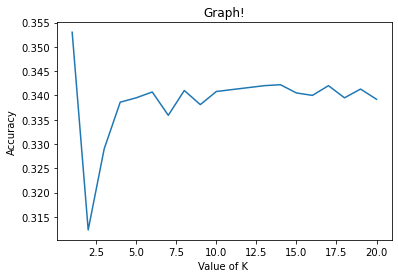

In [17]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values
x = k_choices
# corresponding y axis values
y = k_to_accuracies
# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('Value of K ')
# naming the y axis
plt.ylabel('Accuracy')
# giving a title to my graph
plt.title('Graph!')
 
# function to show the plot
plt.show()

In [ ]:
"""DATASET Link: https://github.com/YoongiKim/CIFAR-10-images  

The KNN algorithm and the KNN classifier were used to categorize the CIFAR10 dataset. The idea was to figure out how
accurate each K value was. K values ranging from 1 to 20 are being considered. As a result, we generated the model's accuracy 
for each of the 1 to 20 values of K, which was then tested using the CIFAR10 dataset's provided test set. The accuracy of the 
results was calculated and plotted against the k values. We detected very low accuracy, around 31%, and a little more than that,
like 34%, or even 35% on rare occasions. This is a model with a poor level of accuracy. The accuracy of the k values and their 
accompanying accuracy ranges from around 31% to 34%, according to the graph. So now we're trying to figure out why the precision
is so low. First and foremost, we must keep in mind that the CIFAR10 dataset is an image dataset with rgb pictures. As a result,
a neural network would have been ideal for improving accuracy. Because neural networks work and learn patterns with different 
layers of neurons and have more capability to classify photos from varied positions, image datasets will deliver more accuracy
if we employ them.
The traditional machine learning approach, on the other hand, uses a geometrical approach to classify the images. However, 
this makes it difficult to classify photos, and as a result, the accuracy is low.
Finally, we may conclude that, in order to achieve higher accuracy and better outcomes, we should employ neural networks 
rather than machine learning for any type of picture classification.